# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
import sklearn.linear_model as lm
model = lm.LinearRegression()
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''

  
    # YOUR CODE HERE
    xx_shaped = xx.reshape(-1,1)
    housepredictor = model.fit(xx_shaped,yy)
    return (housepredictor.coef_, housepredictor.intercept_)

In [ ]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
print(f"y = {mm}x + {bb}")

y = [134.52528772]x + 71270.49244872917


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

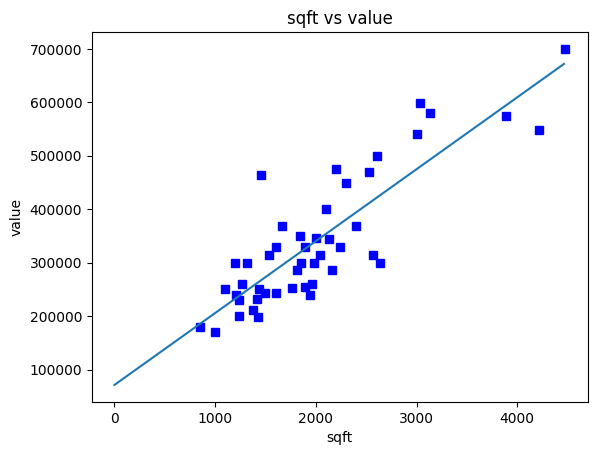

In [ ]:
# Plot the data
plt.plot(x_sqft, y_value, 'bs')
plt.xlabel('sqft')
plt.ylabel('value')
plt.title('sqft vs value')

# Display the figure - not necessary in a jupyter notebook

step = int((max(x_sqft) - min(x_sqft)) // 100)
x2 = []
y2 = []

for i in range(0, round(max(x_sqft)), step):
    x2.append(i)
    y2.append(i * mm + bb)

plt.plot(x2, y2)

# Sample the range from minimum to maximum sqft to get 100 points

# Apply the best fit equation to each sample point and plot the result

1: Given these parameters, how much should a house with 1600 sqft cost?

286510.95280112

In [ ]:
print(1600*mm + bb)

[286510.95280112]


2: From the dataset, how much did a house with 1600 sqft actually cost?

329900.0

In [ ]:
print(y_value[1])

329900.0


3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

43389.04719888, 13.15218163 percent

In [ ]:
dif = y_value[1]- (1600*mm + bb)
print(dif)
print(dif / y_value[1] * 100)

[43389.04719888]
[13.15218163]


Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: [134.52528772] 71270.49244872917


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [ ]:
x_sqft_shaped = x_sqft.reshape(-1,1)

# Fit onto the results
housepredictor = model.fit(x_sqft_shaped,y_value)

In [ ]:
import sklearn.linear_model as lm
# Get the number of bedrooms
x_rooms = data_array[:,1]

# Reshape the data to the required format for lm's fit function
x_rooms_shaped = x_rooms.reshape(-1,1)

# Concatenate the data into a single array
x_combined = np.concatenate((x_sqft_shaped,x_rooms_shaped),axis=1)

# Create a new linear regression model
model_2d = lm.LinearRegression()
housepredictor_2d = model_2d.fit(x_combined,y_value)

# housepredictor.score(x_sqft, numbeds_shaped)
# YOUR CODE HERE
print(housepredictor.score(x_sqft_shaped,y_value))
print(housepredictor_2d.score(x_combined,y_value))

0.7310037839755306
0.7329450180289142


In [ ]:
x_rooms = data_array[:,1]
x_rooms_shaped = x_rooms.reshape(-1,1)
predictor = model.fit(x_sqft_shaped, x_rooms_shaped)
print(predictor.score(x_sqft_shaped,x_rooms_shaped))

0.3135632699338188


Do 2 variables have to be verry correlated to reduce their effectiveness together?

even though they are not correlated they are still not effective together

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

<AxesSubplot: >

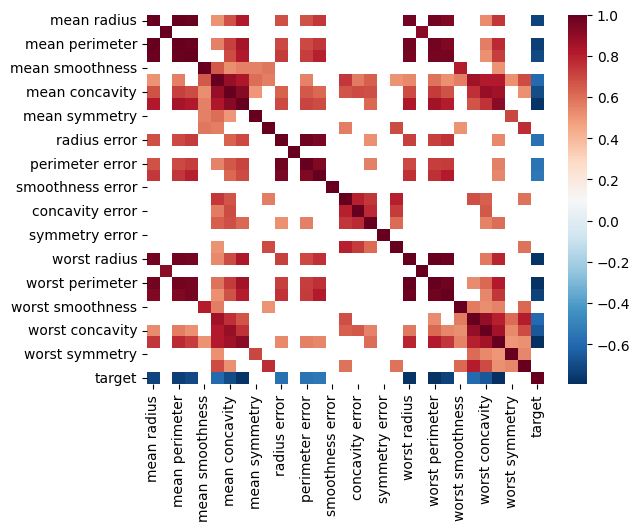

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import sklearn
import seaborn as sns
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
X_cols = ['mean radius', 'mean texture', 'mean area']
Y_cols = data.target
# YOUR CODE HERE
correlation = df.corr()
sns.heatmap(correlation[correlation.abs() > 0.5],cmap='RdBu_r')

Test your logistical regression! You must get an accuracy of > 80%

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
test_size = 0.15
X_train, X_val, y_train, y_val = train_test_split(df[X_cols], data.target, test_size=test_size, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Printing accuracy of testing & training data
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  89.23395445134575
Validation Accuracy is  87.20930232558139


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c6bd552-3b5d-4eec-898d-e0be899a4d6b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>